This cell imports essential libraries:  
- `numpy` for numerical computations,  
- `matplotlib.pyplot` for data visualization,  
- `pandas` for data manipulation,  
- `seaborn` for advanced statistical visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="muted", rc={"axes.facecolor": "#f7f7f7"})  

sns.set_context("talk", font_scale=1.1)

plt.rcParams["figure.figsize"] = (10, 6)  
plt.rcParams["font.family"] = "Arial"  
plt.rcParams["font.size"] = 12  
plt.rcParams["axes.labelsize"] = 12  
plt.rcParams["axes.titlesize"] = 14  
plt.rcParams["xtick.labelsize"] = 10  
plt.rcParams["ytick.labelsize"] = 10  

plt.rcParams["axes.grid"] = True  
plt.rcParams["grid.linestyle"] = "--"  
plt.rcParams["grid.alpha"] = 0.5  


sns.set_palette("colorblind")  


### Get the data

In [3]:
df = pd.read_csv('./data/german_credit_data.csv', index_col=0)

### Exploratory Data Analysis 

In [4]:
exploration = df.copy()

In [5]:
exploration.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
exploration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


This cell checks for any missing values in the `exploration` DataFrame by summing the `null` (NaN) values in each column, helping me assess data completeness before further analysis.

In [7]:
exploration.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

I use exploration.describe() to generate a summary of the exploration DataFrame, which includes key statistics such as mean, standard deviation, min, max, and percentiles for each numerical column, giving me an overview of the data distribution.

In [8]:
exploration.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


I'm doing the same thing here for the categorical variables 

In [9]:
exploration.describe(include="object")

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


#### More Insight on the target

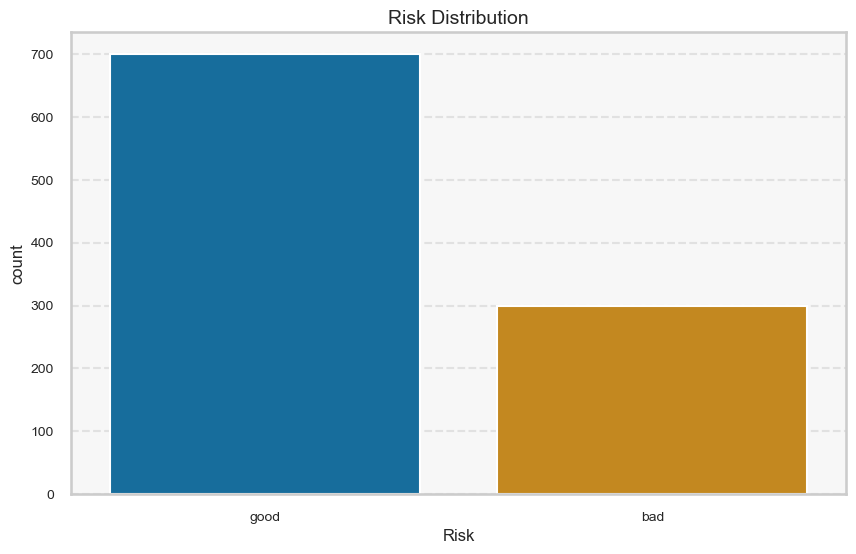

In [10]:
sns.countplot(data=exploration, x="Risk", hue="Risk")
plt.title("Risk Distribution")
plt.show()

I notice that our target variable is imbalanced, which could affect the performance of the machine learning model, making it important to consider techniques like resampling, using appropriate evaluation metrics and using machine learning models that support imblanced dataset.

#### Study of each feature and its correlation with the target

Age

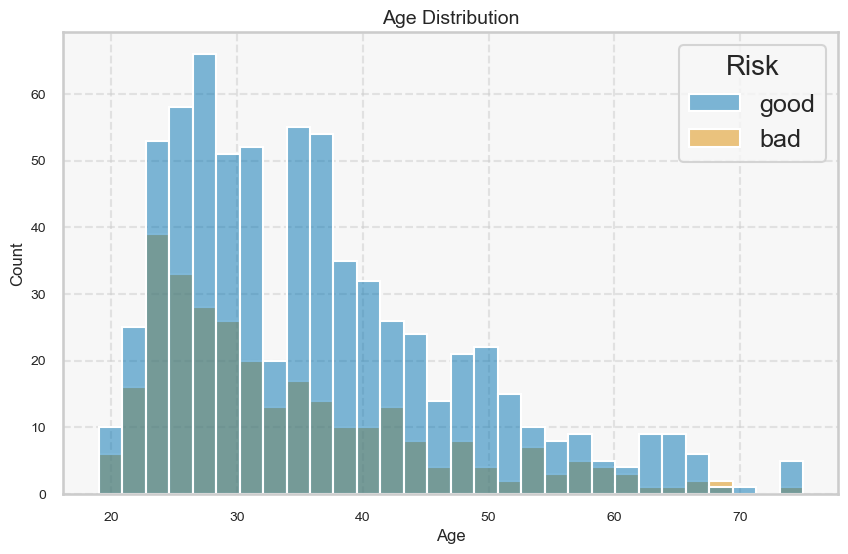

In [11]:
sns.histplot(data=exploration, x="Age",  hue="Risk", bins=30)
plt.title("Age Distribution")
plt.show()

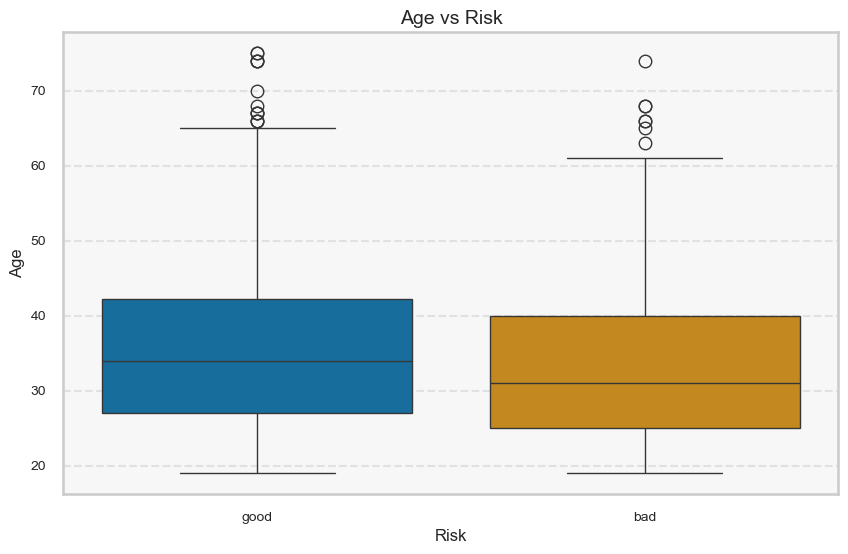

In [12]:
sns.boxplot(data=exploration, y="Age", x="Risk", hue="Risk")
plt.title("Age vs Risk")
plt.show()

The distribution of this variable is non-Gaussian, and the boxplot reveals that individuals classified as good credit risks tend to be older than those classified as bad credit risks.

Credit Amount

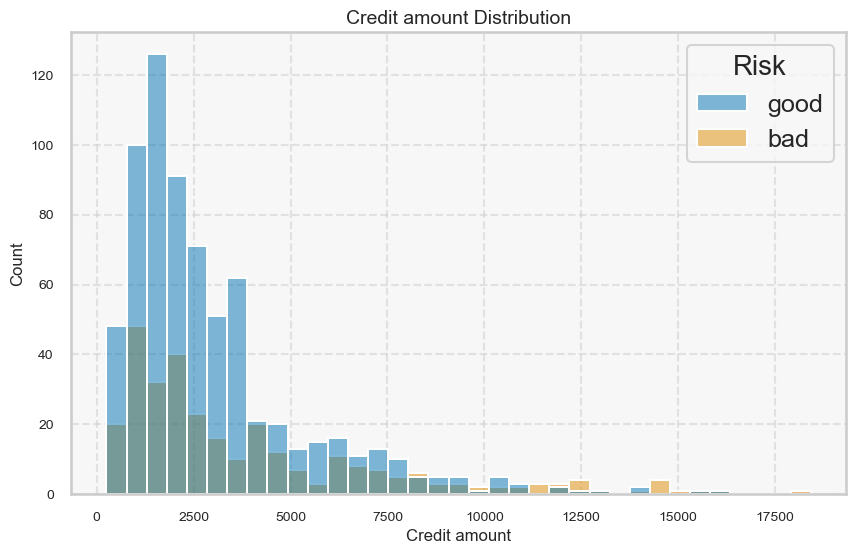

In [13]:
sns.histplot(data=exploration, x="Credit amount", hue="Risk", alpha=0.5)
plt.title("Credit amount Distribution")
plt.show()

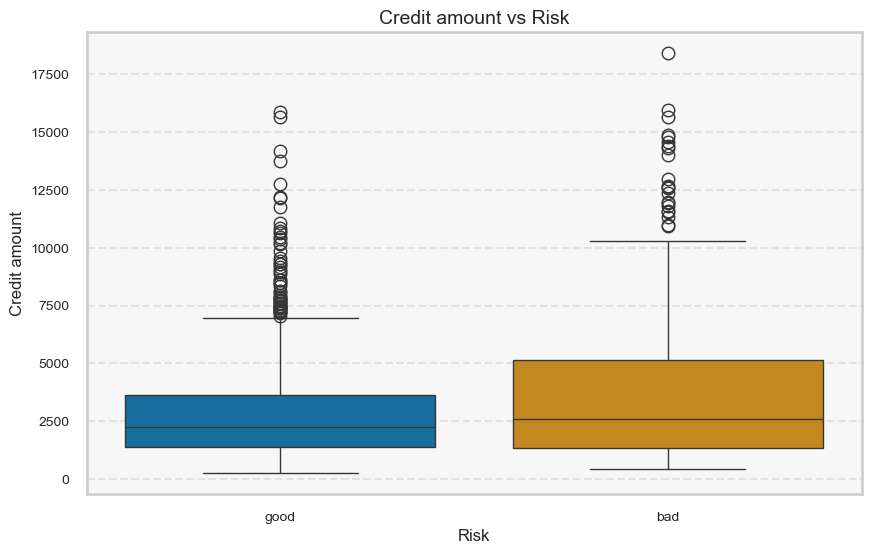

In [14]:
sns.boxplot(data=exploration, y="Credit amount", x="Risk", hue="Risk")
plt.title("Credit amount vs Risk")
plt.show()

The distribution of this variable is non-Gaussian, and individuals classified as good credit risks tend to request smaller credit amounts compared to those classified as bad credit risks.

Duration

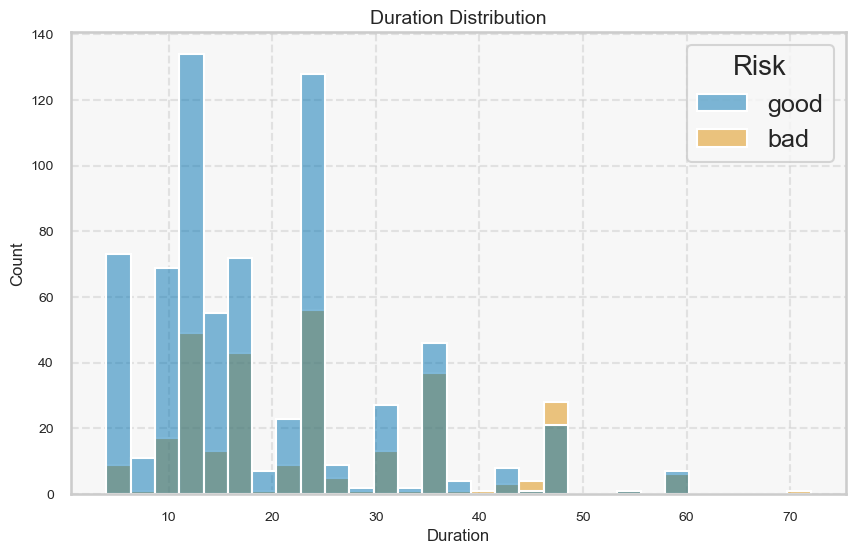

In [15]:
sns.histplot(data=exploration, x="Duration", hue="Risk", alpha=0.5)
plt.title("Duration Distribution")
plt.show()

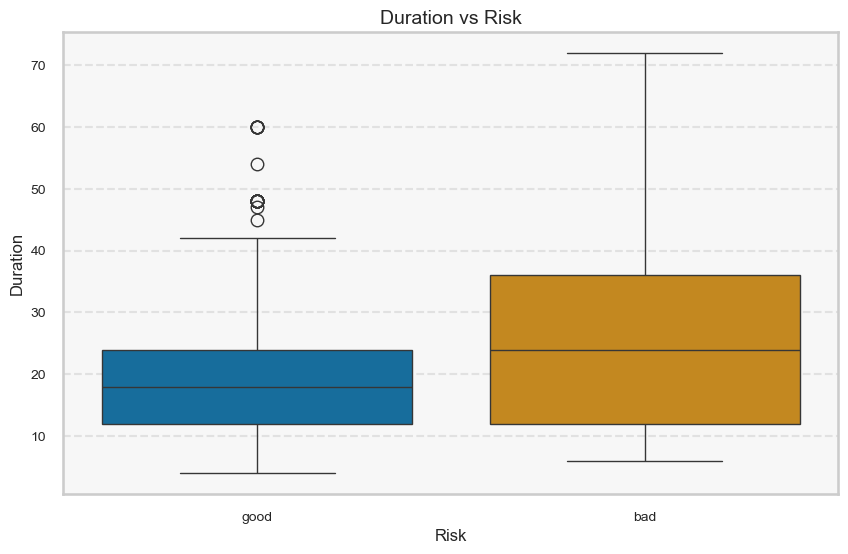

In [16]:
sns.boxplot(data=exploration, y="Duration", x="Risk", hue="Risk")
plt.title("Duration vs Risk")
plt.show()

Categorical variables 

Sex
male      690
female    310
Name: count, dtype: int64


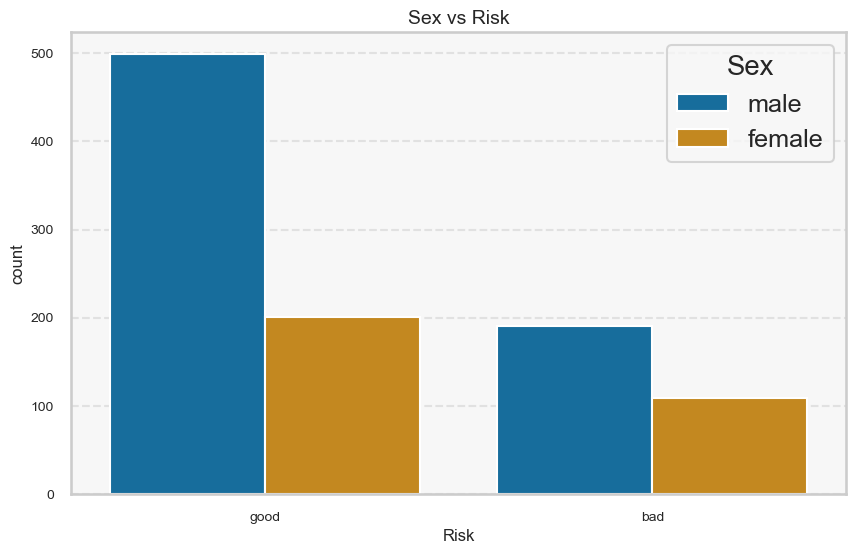

Housing
own     713
rent    179
free    108
Name: count, dtype: int64


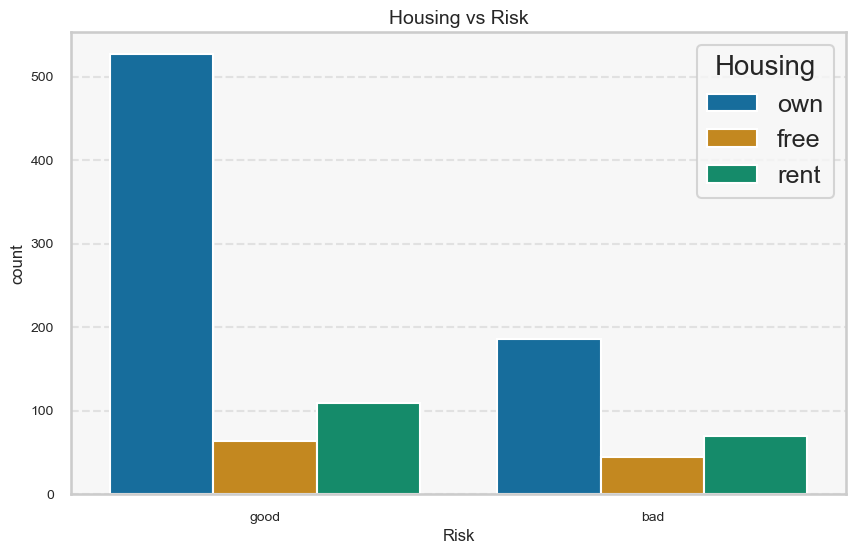

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


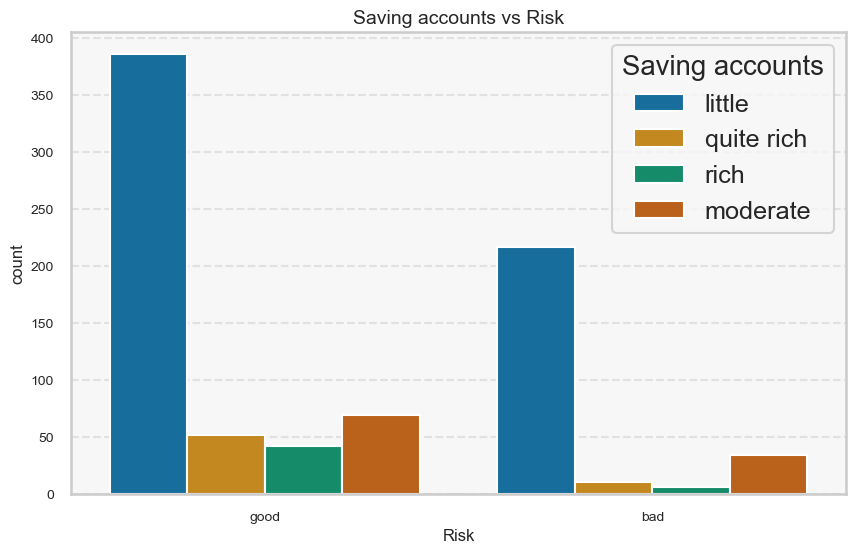

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


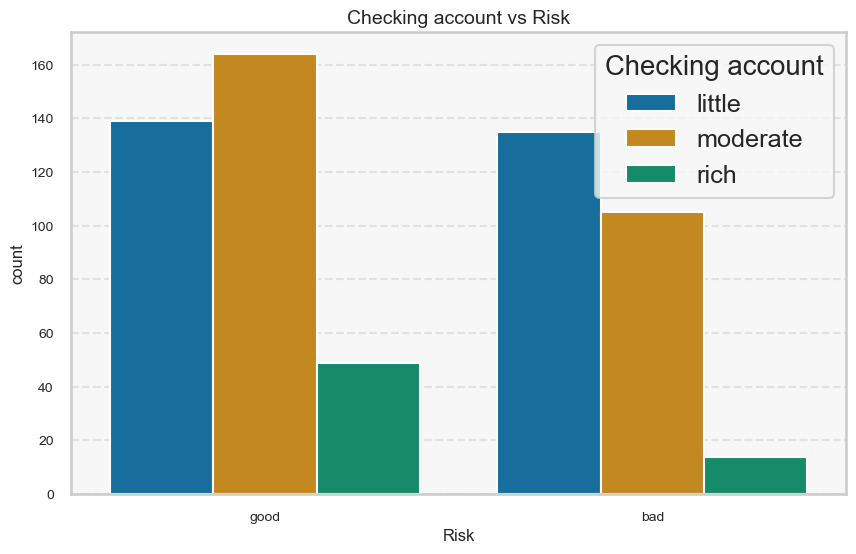

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


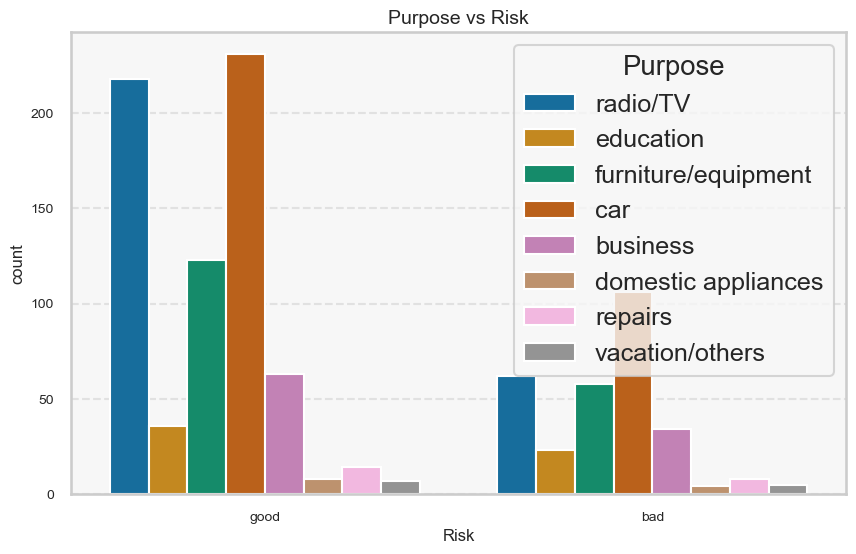

In [17]:
for col in exploration.select_dtypes(include="object").columns[:-1]:
    print(exploration[col].value_counts())
    sns.countplot(data=exploration, x="Risk", hue=col)
    plt.title(f"{col} vs Risk")
    plt.show()

Considering the checking account, many individuals classified as bad credit risks have low checking account balances, while many good credit risks have moderate balances. Generally, good credit risks tend to have higher checking account balances than bad credit risks. For the other variables, no clear patterns can be identified at this point

#### Data Cleaning 

I create a copy of the `exploration` DataFrame and store it in `clean_data` to ensure that the original data remains unchanged while I perform data cleaning tasks.

In [18]:
clean_data = exploration.copy()

Outliers

I define the outlier_thresholds function to calculate the upper and lower limits for outliers based on the interquartile range (IQR). Then, the has_outliers function checks each numerical column in the clean_data DataFrame for outliers by comparing values to the calculated limits. It prints the number of outliers for each variable and returns a list of columns with outliers.

In [19]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
    return variable_names


has_outliers(clean_data, ["Age", "Credit amount", "Duration"])

Age : 23
Credit amount : 72
Duration : 70


['Age', 'Credit amount', 'Duration']

I define the `replace_with_thresholds` function to replace outliers in a specified numerical column with the calculated threshold values (either the lower or upper limit). Then, I apply this function to each integer column in the `clean_data` DataFrame to handle outliers. Finally, I run `has_outliers` again to check if any outliers remain after the replacement process.

In [20]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = int(low_limit)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = int(up_limit)


for col in clean_data.select_dtypes(include=["int64"]).columns:
    replace_with_thresholds(clean_data, col)

has_outliers(clean_data, clean_data.select_dtypes(include=["int64"]).columns)

[]

Handling missing values and preprocess data 

I convert the `Risk` column in the `clean_data` DataFrame, applying a lambda function to replace the values: "bad" is mapped to 0, and any other value (assumed to be "good") is mapped to 1. This prepares the target variable for machine learning by encoding it as a binary variable.

In [21]:
clean_data["Risk"] = clean_data["Risk"].apply(lambda x: 0 if x == "bad" else 1)


Split the dataset in train and test set 

In [22]:
from sklearn.model_selection import train_test_split

X = clean_data.drop(["Risk"], axis=1)
y = clean_data["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

I define preprocessing pipelines for the features in the dataset, handling numeric, nominal categorical, and ordinal categorical features. Numeric features are scaled using `StandardScaler`, nominal categorical features are one-hot encoded, and ordinal categorical features are encoded using `OrdinalEncoder` with custom categories and missing values handled by `KNNImputer`. These transformations are applied to both the training and test sets using `ColumnTransformer`.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

numeric_features = ['Age', 'Credit amount', 'Duration']
categorical_nominal_features = ['Sex','Purpose', 'Housing']
categorical_ordinal_features = ['Checking account', 'Saving accounts']

checking_account_order = ['little', 'moderate', 'rich']
saving_accounts_order = ['little', 'moderate', 'quite rich', 'rich']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[checking_account_order, saving_accounts_order], handle_unknown='use_encoded_value', unknown_value=np.NaN)),
    ('imputer', KNNImputer(n_neighbors=5, weights='distance'))
])

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_nom', categorical_nominal_transformer, categorical_nominal_features),
        ('cat_ord', categorical_ordinal_transformer, categorical_ordinal_features)
    ])

train_data_preprocessed = preprocessing.fit_transform(X_train)
test_data_preprocessed = preprocessing.transform(X_test)


### Modeling


When dealing with imbalanced datasets, certain machine learning classifiers tend to perform better due to their inherent ability to handle imbalance or through modifications like class weights. Here are five classifiers that are effective for imbalanced datasets:
- `Random Forest Classifier`
- `Gradient Boosting Classifiers(XGBoost)`
- `Logistic Regression`
- `k-Nearest Neighbors (k-NN) with Distance Weighting`
- `Support Vector Machines (SVM) with Class Weights`



I import several machine learning models, including `RandomForestClassifier`, `KNeighborsClassifier`, `LogisticRegression`, and `SVC`, to experiment with different algorithms. Additionally, I import evaluation metrics such as `confusion_matrix`, `precision_score`, `recall_score`, `f1_score`, and `fbeta_score`, along with cross-validation tools like `cross_val_score` and `cross_val_predict` to assess the model performance.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, fbeta_score


In [25]:
rf_clf = RandomForestClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
log_reg = LogisticRegression(random_state=42, class_weight="balanced")
svc = SVC(random_state=42, probability=True, class_weight="balanced")


models = [rf_clf, knn_clf, log_reg, svc]

Since our dataset is imbalanced, accuracy is no longer a suitable metric. In this classification task, misclassifying a bad credit risk as good is more detrimental than misclassifying a good credit risk as bad. Therefore, we prioritize precision over recall. To further emphasize precision, we'll use the `fbeta_score` with a beta value of 0.5, which gives precision twice the weight of recall.

In [26]:

def Training(model):
    model.fit(train_data_preprocessed, y_train)
    y_train_pred = cross_val_predict(model, train_data_preprocessed, y_train, cv=3)
    print(f"{model.__class__.__name__} cross-validation confusion matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print(f"{model.__class__.__name__} cross-validation precision score: {precision_score(y_train, y_train_pred):.3f}")
    print(f"{model.__class__.__name__} cross-validation recall score: {recall_score(y_train, y_train_pred):.3f}")
    print(f"{model.__class__.__name__} cross-validation f1 score: {f1_score(y_train, y_train_pred):.3f}")
    print("fbeta_score:", fbeta_score(y_train, y_train_pred, beta=0.5, average='binary').round(2))
    print("\n\n")

for model in models:
    Training(model)

RandomForestClassifier cross-validation confusion matrix:
[[ 85 155]
 [ 70 490]]
RandomForestClassifier cross-validation precision score: 0.760
RandomForestClassifier cross-validation recall score: 0.875
RandomForestClassifier cross-validation f1 score: 0.813
fbeta_score: 0.78



KNeighborsClassifier cross-validation confusion matrix:
[[ 56 184]
 [ 64 496]]
KNeighborsClassifier cross-validation precision score: 0.729
KNeighborsClassifier cross-validation recall score: 0.886
KNeighborsClassifier cross-validation f1 score: 0.800
fbeta_score: 0.76



LogisticRegression cross-validation confusion matrix:
[[150  90]
 [200 360]]
LogisticRegression cross-validation precision score: 0.800
LogisticRegression cross-validation recall score: 0.643
LogisticRegression cross-validation f1 score: 0.713
fbeta_score: 0.76



SVC cross-validation confusion matrix:
[[148  92]
 [169 391]]
SVC cross-validation precision score: 0.810
SVC cross-validation recall score: 0.698
SVC cross-validation f1 score: 0.7

In [27]:

def Testing(model):    
    y_test_pred = model.predict(test_data_preprocessed)
    print(f"{model.__class__.__name__} cross-validation confusion matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"{model.__class__.__name__} cross-validation precision score: {precision_score(y_test, y_test_pred):.3f}")
    print(f"{model.__class__.__name__} cross-validation recall score: {recall_score(y_test, y_test_pred):.3f}")
    print(f"{model.__class__.__name__} cross-validation f1 score: {f1_score(y_test, y_test_pred):.3f}")
    print("fbeta_score:", fbeta_score(y_test, y_test_pred, beta=0.5, average='binary').round(2))
    print("\n\n")

for model in models:
    Testing(model)

RandomForestClassifier cross-validation confusion matrix:
[[ 23  37]
 [ 17 123]]
RandomForestClassifier cross-validation precision score: 0.769
RandomForestClassifier cross-validation recall score: 0.879
RandomForestClassifier cross-validation f1 score: 0.820
fbeta_score: 0.79



KNeighborsClassifier cross-validation confusion matrix:
[[ 14  46]
 [ 18 122]]
KNeighborsClassifier cross-validation precision score: 0.726
KNeighborsClassifier cross-validation recall score: 0.871
KNeighborsClassifier cross-validation f1 score: 0.792
fbeta_score: 0.75



LogisticRegression cross-validation confusion matrix:
[[40 20]
 [45 95]]
LogisticRegression cross-validation precision score: 0.826
LogisticRegression cross-validation recall score: 0.679
LogisticRegression cross-validation f1 score: 0.745
fbeta_score: 0.79



SVC cross-validation confusion matrix:
[[36 24]
 [45 95]]
SVC cross-validation precision score: 0.798
SVC cross-validation recall score: 0.679
SVC cross-validation f1 score: 0.734
fbeta

Considering the results the best model is Random Forest Classifier. Let's fine tune it

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth":[None,10, 20,25, 35],
    "criterion": ["entropy", "log_loss"],
    "n_estimators": [100,200,300]
}

cv = GridSearchCV(rf_clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

cv.fit(train_data_preprocessed, y_train)

print("Best score:", cv.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.7324819539485418


In [29]:
print(cv.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}


In [30]:
best_rf = cv.best_estimator_

Testing(best_rf)

RandomForestClassifier cross-validation confusion matrix:
[[ 19  41]
 [ 11 129]]
RandomForestClassifier cross-validation precision score: 0.759
RandomForestClassifier cross-validation recall score: 0.921
RandomForestClassifier cross-validation f1 score: 0.832
fbeta_score: 0.79





#### XGBoost Classisfier 

In [31]:
# %pip install xgboost (if you don't have it installed)
from xgboost import XGBClassifier, XGBRFClassifier


xgb = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))

Training(xgb)



XGBClassifier cross-validation confusion matrix:
[[128 112]
 [119 441]]
XGBClassifier cross-validation precision score: 0.797
XGBClassifier cross-validation recall score: 0.787
XGBClassifier cross-validation f1 score: 0.792
fbeta_score: 0.8





In [32]:
Testing(xgb)

XGBClassifier cross-validation confusion matrix:
[[ 35  25]
 [ 26 114]]
XGBClassifier cross-validation precision score: 0.820
XGBClassifier cross-validation recall score: 0.814
XGBClassifier cross-validation f1 score: 0.817
fbeta_score: 0.82





The XGBoost Classifier outperforms all the previous models, so we will choose it for our predictions, as it provides the best performance in this particular task.